## Regression models using Boston Housing Data
1) Importing Libraries
2) Importing Data
3) Inspecting Data
4) Exploratory Data Analysis
5) ML Pipeline
    + Study1: Linear Regression (Baseline)
    + Study2: Binning + Interactions + Ridge
    + Study3: Binning + Interactions + Lasso
    + Study4: Binning + Interactions + ElasticNet
    + Study5: Binning + Interactions + SGD
    + Study6: Binning + Interactions + RF
    + Study7: Binning + Interactions + GBM
    + Study8: Binning + Interactions + Grid Search
6) Model Inference and Evaluation
7) Model Explanations

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shap

from sklearn.datasets import fetch_california_housing
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from collections import namedtuple

### Importing Data

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

### Inspecting Data

In [4]:
df.shape

(20640, 9)

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.isna().sum().sort_values(ascending=False)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


### Exploratory Data Analysis

In [9]:
sns.set_theme()

<AxesSubplot: xlabel='target', ylabel='Count'>

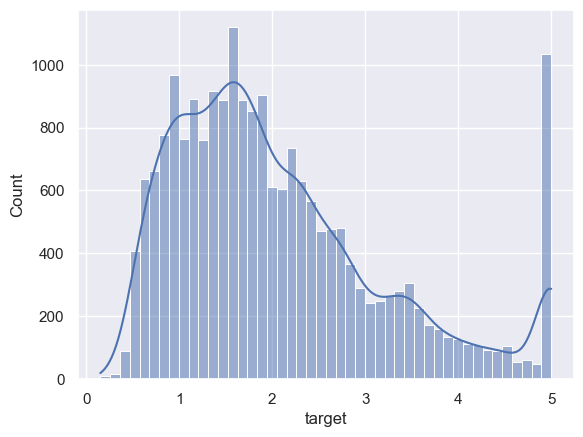

In [10]:
sns.histplot(df['target'], kde=True)

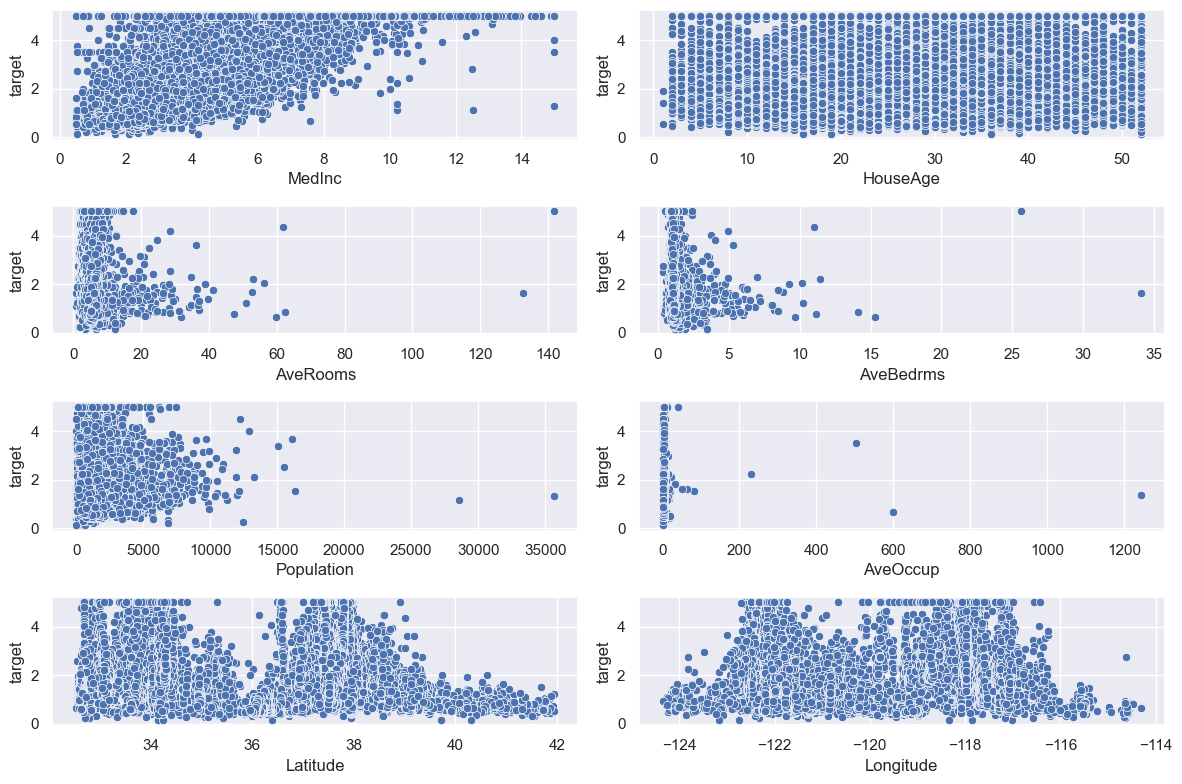

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(12, 8))
cols = list(df.columns)
cols.remove('target')
k = 0
for i in range(4):
    for j in range(2):
        if k >= len(cols):
            continue
        sns.scatterplot(x=cols[k], y='target', data=df, ax=ax[i][j])
        k += 1
plt.tight_layout()

<AxesSubplot: xlabel='Latitude', ylabel='Longitude'>

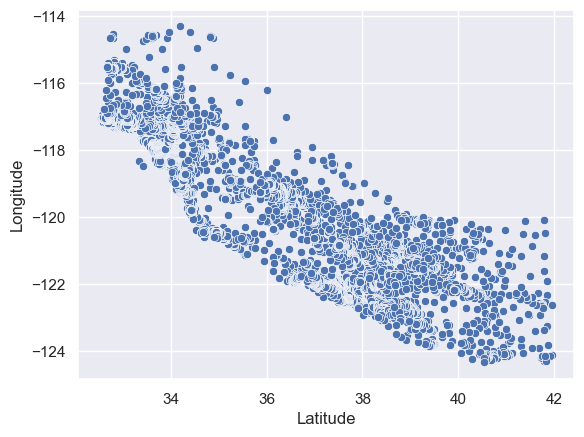

In [12]:
sns.scatterplot(x='Latitude', y='Longitude', data=df)

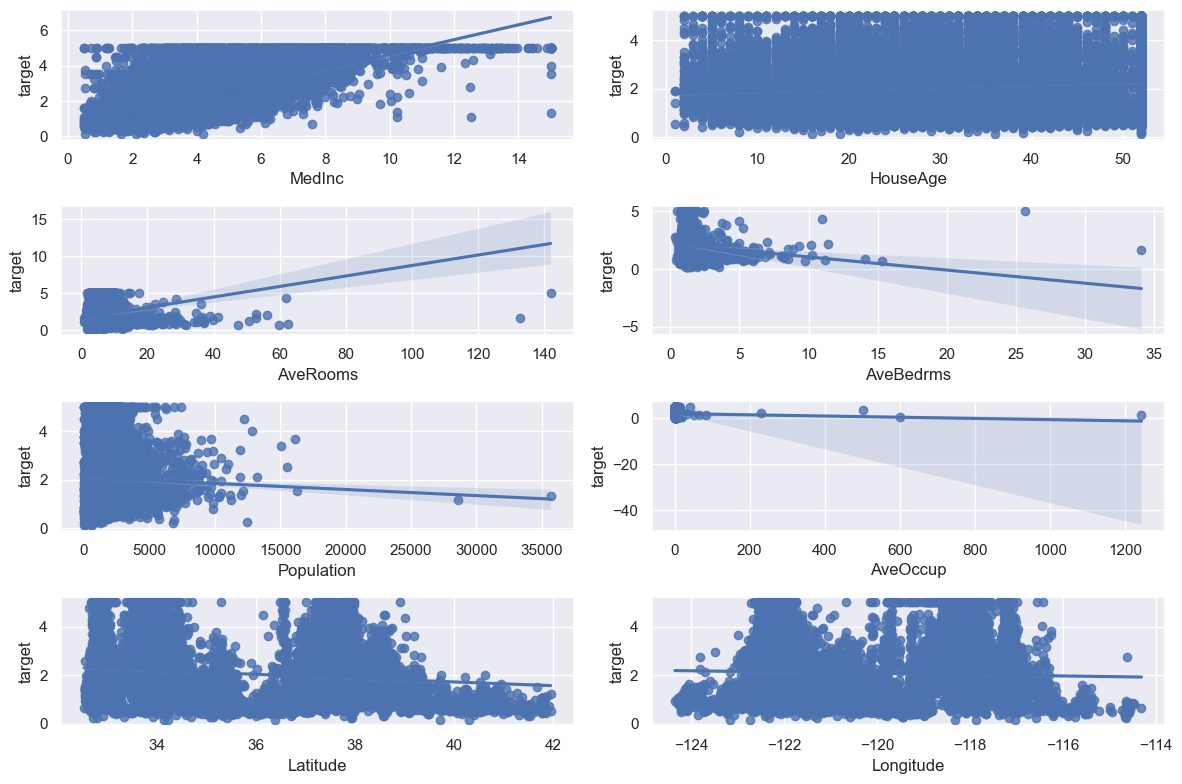

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(12, 8))
cols = list(df.columns)
cols.remove('target')
k = 0
for i in range(4):
    for j in range(2):
        if k >= len(cols):
            continue
        sns.regplot(x=cols[k], y='target', data=df, ax=ax[i][j])
        k += 1
plt.tight_layout()

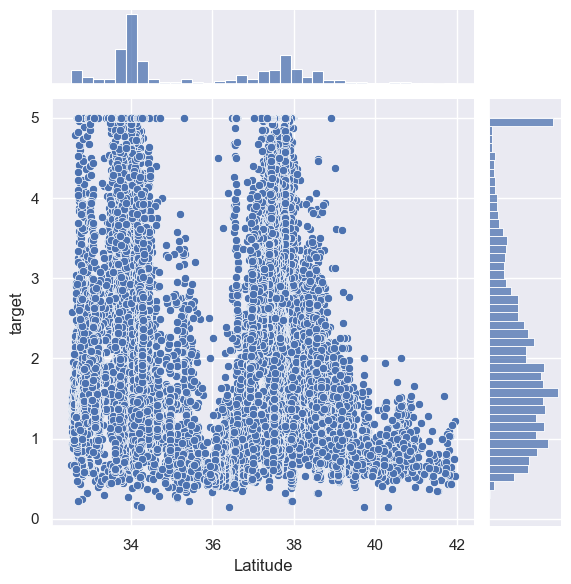

In [14]:
sns.jointplot(x='Latitude', y='target', data=df)

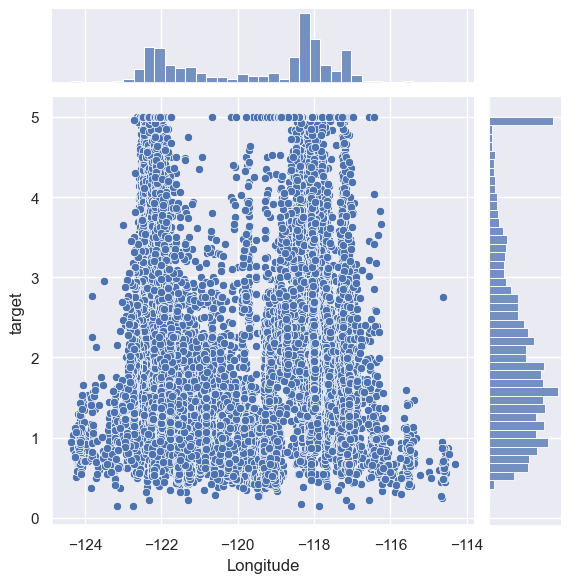

In [15]:
sns.jointplot(x='Longitude', y='target', data=df)

### ML Pipeline

In [16]:
experimentation = namedtuple('Experimentation', 
                              [
                                  'train_score', 
                                  'test_score', 
                                  'train_mse', 
                                  'test_mse', 
                                  'intercept', 
                                  'coef', 
                                  'model'
                              ]
                            )
studies = dict()

#### Study1: Linear Regression (Baseline)

In [17]:
X = df.copy(deep=True)
y = X.pop('target')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
ct = ColumnTransformer([('scaler', StandardScaler(), make_column_selector(dtype_exclude="category"))], remainder='passthrough')
pl = Pipeline([('transformer', ct), ('model', LinearRegression())])
pl.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9ede770850>)])),
                ('model', LinearRegression())])

In [20]:
y_train_hat = pl.predict(X_train)
y_test_hat = pl.predict(X_test)

In [21]:
print(f'Train score: {pl.score(X_train, y_train)}')
print(f'Test score: {pl.score(X_test, y_test)}')

Train score: 0.6093459727972159
Test score: 0.5957702326061664


In [22]:
print(f'Train MSE: {mean_squared_error(y_train, y_train_hat)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_hat)}')

Train MSE: 0.5233576288267755
Test MSE: 0.5305677824766752


In [23]:
print(f'Train R2: {r2_score(y_train, y_train_hat)}')
print(f'Test R2: {r2_score(y_test, y_test_hat)}')

Train R2: 0.6093459727972159
Test R2: 0.5957702326061664


In [24]:
model = pl.steps[-1][1]

In [25]:
model.intercept_

2.0692396089424165

In [26]:
pd.Series(dict(zip(X_train.columns, model.coef_))).sort_values(ascending=False)

MedInc        0.849222
AveBedrms     0.348410
HouseAge      0.122119
Population   -0.000884
AveOccup     -0.041698
AveRooms     -0.299558
Longitude    -0.868617
Latitude     -0.893856
dtype: float64

In [27]:
study = experimentation(
    train_score=pl.score(X_train, y_train),
    test_score=pl.score(X_test, y_test),
    train_mse=mean_squared_error(y_train, y_train_hat),
    test_mse=mean_squared_error(y_test, y_test_hat),
    intercept=pl.steps[-1][1].intercept_,
    coef=pd.Series(dict(zip(X_train.columns, model.coef_))).sort_values(ascending=False),
    model=pl.steps[-1][1]
)
studies['study1_linreg'] = study

In [28]:
[(k, v.test_mse) for k, v in studies.items()]

[('study1_linreg', 0.5305677824766752)]

#### Study2: Binning + Interactions + Ridge

In [29]:
scaler_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
interactions_cols = ['Latitude', 'Longitude']

pl_interactions = Pipeline([
    ('binning', KBinsDiscretizer(n_bins=5)), 
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False))
])
ct = ColumnTransformer([
    ('scaler', StandardScaler(), scaler_cols),
    ('interactions', pl_interactions, interactions_cols),
], remainder='passthrough')
pl = Pipeline([('transformer', ct), ('model', Ridge())])
pl.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup']),
                                                 ('interactions',
                                                  Pipeline(steps=[('binning',
                                                                   KBinsDiscretizer()),
                                                                  ('interactions',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['Latitude', 'Long

In [30]:
y_train_hat = pl.predict(X_train)
y_test_hat = pl.predict(X_test)

In [31]:
print(f'Train score: {pl.score(X_train, y_train)}')
print(f'Test score: {pl.score(X_test, y_test)}')

Train score: 0.6187603150115337
Test score: 0.6054809753122304


In [32]:
print(f'Train MSE: {mean_squared_error(y_train, y_train_hat)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_hat)}')

Train MSE: 0.5107452724317099
Test MSE: 0.5178220431983053


In [33]:
print(f'Train R2: {r2_score(y_train, y_train_hat)}')
print(f'Test R2: {r2_score(y_test, y_test_hat)}')

Train R2: 0.6187603150115337
Test R2: 0.6054809753122304


In [34]:
model = pl.steps[-1][1]

In [35]:
model.intercept_

2.0657133158312724

In [36]:
pd.Series(dict(zip(X_train.columns, model.coef_))).sort_values(ascending=False)

MedInc        0.849677
Latitude      0.344884
AveBedrms     0.290279
Longitude     0.158178
HouseAge      0.105943
Population    0.021392
AveOccup     -0.040412
AveRooms     -0.283559
dtype: float64

In [37]:
study = experimentation(
    train_score=pl.score(X_train, y_train),
    test_score=pl.score(X_test, y_test),
    train_mse=mean_squared_error(y_train, y_train_hat),
    test_mse=mean_squared_error(y_test, y_test_hat),
    intercept=pl.steps[-1][1].intercept_,
    coef=pd.Series(dict(zip(X_train.columns, model.coef_))).sort_values(ascending=False),
    model=pl.steps[-1][1]
)
studies['study2_ridge'] = study

In [38]:
[(k, v.test_mse) for k, v in studies.items()]

[('study1_linreg', 0.5305677824766752), ('study2_ridge', 0.5178220431983053)]

#### Study3: Binning + Interactions + Lasso

In [39]:
scaler_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
interactions_cols = ['Latitude', 'Longitude']

pl_interactions = Pipeline([
    ('binning', KBinsDiscretizer(n_bins=5)), 
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False))
])
ct = ColumnTransformer([
    ('scaler', StandardScaler(), scaler_cols),
    ('interactions', pl_interactions, interactions_cols),
], remainder='passthrough')
pl = Pipeline([('transformer', ct), ('model', Lasso())])
pl.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup']),
                                                 ('interactions',
                                                  Pipeline(steps=[('binning',
                                                                   KBinsDiscretizer()),
                                                                  ('interactions',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['Latitude', 'Long

In [40]:
y_train_hat = pl.predict(X_train)
y_test_hat = pl.predict(X_test)

In [41]:
print(f'Train score: {pl.score(X_train, y_train)}')
print(f'Test score: {pl.score(X_test, y_test)}')

Train score: 0.0
Test score: -3.930972139576383e-06


In [42]:
print(f'Train MSE: {mean_squared_error(y_train, y_train_hat)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_hat)}')

Train MSE: 1.3396959774719193
Test MSE: 1.3125452673724591


In [43]:
print(f'Train R2: {r2_score(y_train, y_train_hat)}')
print(f'Test R2: {r2_score(y_test, y_test_hat)}')

Train R2: 0.0
Test R2: -3.930972139576383e-06


In [44]:
model = pl.steps[-1][1]

In [45]:
model.intercept_

2.0692396089424143

In [46]:
pd.Series(dict(zip(X_train.columns, model.coef_))).sort_values(ascending=False)

MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms    -0.0
Population   -0.0
AveOccup     -0.0
Latitude      0.0
Longitude     0.0
dtype: float64

In [47]:
study = experimentation(
    train_score=pl.score(X_train, y_train),
    test_score=pl.score(X_test, y_test),
    train_mse=mean_squared_error(y_train, y_train_hat),
    test_mse=mean_squared_error(y_test, y_test_hat),
    intercept=pl.steps[-1][1].intercept_,
    coef=pd.Series(dict(zip(X_train.columns, model.coef_))).sort_values(ascending=False),
    model=pl.steps[-1][1]
)
studies['study3_lasso'] = study

In [48]:
[(k, v.test_mse) for k, v in studies.items()]

[('study1_linreg', 0.5305677824766752),
 ('study2_ridge', 0.5178220431983053),
 ('study3_lasso', 1.3125452673724591)]

#### Study4: Binning + Interactions + ElasticNet

In [49]:
scaler_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
interactions_cols = ['Latitude', 'Longitude']

pl_interactions = Pipeline([
    ('binning', KBinsDiscretizer(n_bins=5)), 
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False))
])
ct = ColumnTransformer([
    ('scaler', StandardScaler(), scaler_cols),
    ('interactions', pl_interactions, interactions_cols),
], remainder='passthrough')
pl = Pipeline([('transformer', ct), ('model', ElasticNet())])
pl.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup']),
                                                 ('interactions',
                                                  Pipeline(steps=[('binning',
                                                                   KBinsDiscretizer()),
                                                                  ('interactions',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['Latitude', 'Long

In [50]:
y_train_hat = pl.predict(X_train)
y_test_hat = pl.predict(X_test)

In [51]:
print(f'Train score: {pl.score(X_train, y_train)}')
print(f'Test score: {pl.score(X_test, y_test)}')

Train score: 0.20595798742993687
Test score: 0.2060087441777384


In [52]:
print(f'Train MSE: {mean_squared_error(y_train, y_train_hat)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_hat)}')

Train MSE: 1.0637748901838207
Test MSE: 1.042145368520216


In [53]:
print(f'Train R2: {r2_score(y_train, y_train_hat)}')
print(f'Test R2: {r2_score(y_test, y_test_hat)}')

Train R2: 0.20595798742993687
Test R2: 0.2060087441777384


In [54]:
model = pl.steps[-1][1]

In [55]:
model.intercept_

2.0692396089424143

In [56]:
pd.Series(dict(zip(X_train.columns, model.coef_))).sort_values(ascending=False)

MedInc        0.197728
HouseAge      0.000000
AveRooms      0.000000
AveBedrms    -0.000000
Population   -0.000000
AveOccup     -0.000000
Latitude      0.000000
Longitude     0.000000
dtype: float64

In [57]:
study = experimentation(
    train_score=pl.score(X_train, y_train),
    test_score=pl.score(X_test, y_test),
    train_mse=mean_squared_error(y_train, y_train_hat),
    test_mse=mean_squared_error(y_test, y_test_hat),
    intercept=pl.steps[-1][1].intercept_,
    coef=pd.Series(dict(zip(X_train.columns, model.coef_))).sort_values(ascending=False),
    model=pl.steps[-1][1]
)
studies['study4_elasticnet'] = study

In [58]:
[(k, v.test_mse) for k, v in studies.items()]

[('study1_linreg', 0.5305677824766752),
 ('study2_ridge', 0.5178220431983053),
 ('study3_lasso', 1.3125452673724591),
 ('study4_elasticnet', 1.042145368520216)]

#### Study5: Binning + Interactions + SGD

In [59]:
scaler_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
interactions_cols = ['Latitude', 'Longitude']

pl_interactions = Pipeline([
    ('binning', KBinsDiscretizer(n_bins=5)), 
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False))
])
ct = ColumnTransformer([
    ('scaler', StandardScaler(), scaler_cols),
    ('interactions', pl_interactions, interactions_cols),
], remainder='passthrough')
pl = Pipeline([('transformer', ct), ('model', SGDRegressor())])
pl.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup']),
                                                 ('interactions',
                                                  Pipeline(steps=[('binning',
                                                                   KBinsDiscretizer()),
                                                                  ('interactions',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['Latitude', 'Long

In [60]:
y_train_hat = pl.predict(X_train)
y_test_hat = pl.predict(X_test)

In [61]:
print(f'Train score: {pl.score(X_train, y_train)}')
print(f'Test score: {pl.score(X_test, y_test)}')

Train score: 0.6126135881928672
Test score: 0.6059574405879042


In [62]:
print(f'Train MSE: {mean_squared_error(y_train, y_train_hat)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_hat)}')

Train MSE: 0.5189800176252962
Test MSE: 0.5171966634140028


In [63]:
print(f'Train R2: {r2_score(y_train, y_train_hat)}')
print(f'Test R2: {r2_score(y_test, y_test_hat)}')

Train R2: 0.6126135881928672
Test R2: 0.6059574405879042


In [64]:
model = pl.steps[-1][1]

In [65]:
model.intercept_

array([0.04357929])

In [66]:
pd.Series(dict(zip(X_train.columns, model.coef_))).sort_values(ascending=False)

Latitude      1.146071
Longitude     0.997591
MedInc        0.857632
AveBedrms     0.269383
HouseAge      0.108273
AveOccup      0.043394
Population    0.019137
AveRooms     -0.291679
dtype: float64

In [67]:
study = experimentation(
    train_score=pl.score(X_train, y_train),
    test_score=pl.score(X_test, y_test),
    train_mse=mean_squared_error(y_train, y_train_hat),
    test_mse=mean_squared_error(y_test, y_test_hat),
    intercept=pl.steps[-1][1].intercept_,
    coef=pd.Series(dict(zip(X_train.columns, model.coef_))).sort_values(ascending=False),
    model=pl.steps[-1][1]
)
studies['study5_sgd'] = study

In [68]:
[(k, v.test_mse) for k, v in studies.items()]

[('study1_linreg', 0.5305677824766752),
 ('study2_ridge', 0.5178220431983053),
 ('study3_lasso', 1.3125452673724591),
 ('study4_elasticnet', 1.042145368520216),
 ('study5_sgd', 0.5171966634140028)]

#### Study6: Binning + Interactions + RF

In [69]:
interactions_cols = ['Latitude', 'Longitude']

pl_interactions = Pipeline([
    ('binning', KBinsDiscretizer(n_bins=5)), 
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False))
])
ct = ColumnTransformer([
    ('interactions', pl_interactions, interactions_cols),
], remainder='passthrough')
pl = Pipeline([('transformer', ct), ('model', RandomForestRegressor())])
pl.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('interactions',
                                                  Pipeline(steps=[('binning',
                                                                   KBinsDiscretizer()),
                                                                  ('interactions',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['Latitude', 'Longitude'])])),
                ('model', RandomForestRegressor())])

In [70]:
y_train_hat = pl.predict(X_train)
y_test_hat = pl.predict(X_test)

In [71]:
print(f'Train score: {pl.score(X_train, y_train)}')
print(f'Test score: {pl.score(X_test, y_test)}')

Train score: 0.9644692796201163
Test score: 0.7402092538839008


In [72]:
print(f'Train MSE: {mean_squared_error(y_train, y_train_hat)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_hat)}')

Train MSE: 0.047600363169609756
Test MSE: 0.3409857739162689


In [73]:
print(f'Train R2: {r2_score(y_train, y_train_hat)}')
print(f'Test R2: {r2_score(y_test, y_test_hat)}')

Train R2: 0.9644692796201163
Test R2: 0.7402092538839008


In [74]:
transformer = pl.steps[0][1]
model = pl.steps[-1][1]

In [75]:
pd.Series(dict(zip(transformer.get_feature_names_out(), model.feature_importances_))).sort_values(ascending=False)


remainder__MedInc                           0.540470
remainder__AveOccup                         0.149301
remainder__AveRooms                         0.060999
remainder__HouseAge                         0.060652
remainder__Population                       0.044889
                                              ...   
interactions__Latitude_0.0 Longitude_1.0    0.000000
interactions__Latitude_0.0 Longitude_0.0    0.000000
interactions__Latitude_3.0 Latitude_4.0     0.000000
interactions__Latitude_2.0 Latitude_3.0     0.000000
interactions__Latitude_3.0 Longitude_4.0    0.000000
Length: 61, dtype: float64

In [76]:
study = experimentation(
    train_score=pl.score(X_train, y_train),
    test_score=pl.score(X_test, y_test),
    train_mse=mean_squared_error(y_train, y_train_hat),
    test_mse=mean_squared_error(y_test, y_test_hat),
    intercept=0,
    coef=pd.Series(dict(zip(transformer.get_feature_names_out(), model.feature_importances_))).sort_values(ascending=False),
    model=pl.steps[-1][1]
)
studies['study6_rf'] = study

In [77]:
[(k, v.test_mse) for k, v in studies.items()]

[('study1_linreg', 0.5305677824766752),
 ('study2_ridge', 0.5178220431983053),
 ('study3_lasso', 1.3125452673724591),
 ('study4_elasticnet', 1.042145368520216),
 ('study5_sgd', 0.5171966634140028),
 ('study6_rf', 0.3409857739162689)]

#### Study7: Binning + Interactions + GBM

In [78]:
interactions_cols = ['Latitude', 'Longitude']

pl_interactions = Pipeline([
    ('binning', KBinsDiscretizer(n_bins=5)), 
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False))
])
ct = ColumnTransformer([
    ('interactions', pl_interactions, interactions_cols),
], remainder='passthrough')
pl = Pipeline([('transformer', ct), ('model', GradientBoostingRegressor())])
pl.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('interactions',
                                                  Pipeline(steps=[('binning',
                                                                   KBinsDiscretizer()),
                                                                  ('interactions',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['Latitude', 'Longitude'])])),
                ('model', GradientBoostingRegressor())])

In [79]:
y_train_hat = pl.predict(X_train)
y_test_hat = pl.predict(X_test)

In [80]:
print(f'Train score: {pl.score(X_train, y_train)}')
print(f'Test score: {pl.score(X_test, y_test)}')

Train score: 0.7598805770712926
Test score: 0.7274073823404466


In [81]:
print(f'Train MSE: {mean_squared_error(y_train, y_train_hat)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_hat)}')

Train MSE: 0.3216870250104677
Test MSE: 0.3577887437721335


In [82]:
print(f'Train R2: {r2_score(y_train, y_train_hat)}')
print(f'Test R2: {r2_score(y_test, y_test_hat)}')

Train R2: 0.7598805770712926
Test R2: 0.7274073823404466


In [83]:
transformer = pl.steps[0][1]
model = pl.steps[-1][1]

In [84]:
pd.Series(dict(zip(transformer.get_feature_names_out(), model.feature_importances_))).sort_values(ascending=False)


remainder__MedInc                           0.650775
remainder__AveOccup                         0.136272
remainder__HouseAge                         0.038002
interactions__Latitude_1.0 Longitude_2.0    0.033523
interactions__Latitude_3.0 Longitude_0.0    0.032801
                                              ...   
interactions__Latitude_3.0 Longitude_1.0    0.000000
interactions__Latitude_0.0 Longitude_0.0    0.000000
interactions__Latitude_3.0 Longitude_3.0    0.000000
interactions__Latitude_3.0 Longitude_4.0    0.000000
interactions__Latitude_4.0 Longitude_2.0    0.000000
Length: 61, dtype: float64

In [85]:
study = experimentation(
    train_score=pl.score(X_train, y_train),
    test_score=pl.score(X_test, y_test),
    train_mse=mean_squared_error(y_train, y_train_hat),
    test_mse=mean_squared_error(y_test, y_test_hat),
    intercept=0,
    coef=pd.Series(dict(zip(transformer.get_feature_names_out(), model.feature_importances_))).sort_values(ascending=False),
    model=pl.steps[-1][1]
)
studies['study7_gbm'] = study

In [86]:
sorted([(k, v.test_mse) for k, v in studies.items()], key=lambda x: x[1], reverse=False)

[('study6_rf', 0.3409857739162689),
 ('study7_gbm', 0.3577887437721335),
 ('study5_sgd', 0.5171966634140028),
 ('study2_ridge', 0.5178220431983053),
 ('study1_linreg', 0.5305677824766752),
 ('study4_elasticnet', 1.042145368520216),
 ('study3_lasso', 1.3125452673724591)]

#### Study8: Binning + Interactions + GridSearch

In [87]:
interactions_cols = ['Latitude', 'Longitude']
scaling_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

pl_interactions = Pipeline([
    ('binning', KBinsDiscretizer(n_bins=3)), 
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False))
])
X_train_tr1 = pl_interactions.fit_transform(X_train[interactions_cols])
X_test_tr1 = pl_interactions.transform(X_test[interactions_cols])

scaler = StandardScaler()
X_train_tr2 = scaler.fit_transform(X_train[scaling_cols])
X_test_tr2 = scaler.transform(X_test[scaling_cols])

X_train_tr = np.concatenate([X_train_tr1.toarray(), X_train_tr2], axis=1)
X_test_tr = np.concatenate([X_test_tr1.toarray(), X_test_tr2], axis=1)

cross_val_score(GradientBoostingRegressor(), X_train_tr, y_train, cv=5)

array([0.6982817 , 0.69722699, 0.70633249, 0.69954213, 0.6852321 ])

In [88]:
studies['study7_gbm'].train_score, studies['study7_gbm'].test_score

(0.7598805770712926, 0.7274073823404466)

In [89]:
studies['study7_gbm'].model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [90]:
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=20)
rfe.fit(X_train_tr, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=20)

In [91]:
X_train_tr_fs = X_train_tr[:, rfe.support_]
X_test_tr_fs = X_test_tr[:, rfe.support_]

In [92]:
param_grid = dict(alpha=[0.1, 0.5], learning_rate=[0.01, 0.1], n_estimators=[50, 100], max_depth=[3, 5, 7])
gbm_tuner = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=5)
gbm_tuner.fit(X_train_tr_fs, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.1, 0.5], 'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100]})

In [93]:
gbm_tuner.best_params_

{'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [94]:
print(f'Train Score: {gbm_tuner.score(X_train_tr_fs, y_train)}')
print(f'Test Score: {gbm_tuner.score(X_test_tr_fs, y_test)}')

Train Score: 0.789499936657581
Test Score: 0.7085951114029196


In [95]:
y_train_hat = gbm_tuner.best_estimator_.predict(X_train_tr_fs)
y_test_hat = gbm_tuner.best_estimator_.predict(X_test_tr_fs)

In [96]:
print(f'Train MSE: {mean_squared_error(y_train, y_train_hat)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_hat)}')

Train MSE: 0.2820060881174229
Test MSE: 0.38248060389669875


In [97]:
studies['study7_gbm'].train_mse, studies['study7_gbm'].test_mse

(0.3216870250104677, 0.3577887437721335)

In [98]:
[(k, v.test_mse) for k, v in studies.items()]

[('study1_linreg', 0.5305677824766752),
 ('study2_ridge', 0.5178220431983053),
 ('study3_lasso', 1.3125452673724591),
 ('study4_elasticnet', 1.042145368520216),
 ('study5_sgd', 0.5171966634140028),
 ('study6_rf', 0.3409857739162689),
 ('study7_gbm', 0.3577887437721335)]

### Model Inference and Evaluation

In [99]:


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shap

from sklearn.datasets import fetch_california_housing
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from collections import namedtuple

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

X = df.copy(deep=True)
y = X.pop('target')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

interactions_cols = ['Latitude', 'Longitude']
scaling_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

pl_interactions = Pipeline([
    ('binning', KBinsDiscretizer(n_bins=3)), 
    ('interactions', PolynomialFeatures(interaction_only=True, include_bias=False))
])
X_train_tr1 = pl_interactions.fit_transform(X_train[interactions_cols])
X_test_tr1 = pl_interactions.transform(X_test[interactions_cols])

scaler = StandardScaler()
X_train_tr2 = scaler.fit_transform(X_train[scaling_cols])
X_test_tr2 = scaler.transform(X_test[scaling_cols])

X_train_tr = np.concatenate([X_train_tr1.toarray(), X_train_tr2], axis=1)
X_test_tr = np.concatenate([X_test_tr1.toarray(), X_test_tr2], axis=1)

gbm = GradientBoostingRegressor()
gbm.fit(X_train_tr, y_train)

y_test_hat = gbm.predict(X_test_tr)
y_df = pd.DataFrame(zip(y_test, y_test_hat), columns=['y_test', 'y_test_hat'])
y_df['error'] = np.abs(y_df['y_test'] - y_df['y_test_hat'])


In [100]:
y_df['y_test'].mean(), y_df['y_test'].std()

(2.0669681427648494, 1.1457539507173746)

In [101]:
print(f"MSE: {mean_squared_error(y_df['y_test'], y_df['y_test_hat'])}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_df['y_test'], y_df['y_test_hat']))}")

MSE: 0.40520576388282353
RMSE: 0.636557745913773


<AxesSubplot: xlabel='y_test', ylabel='y_test_hat'>

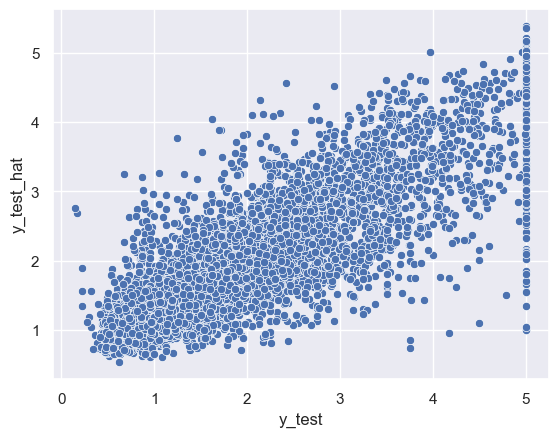

In [102]:
sns.scatterplot(x='y_test', y='y_test_hat', data=y_df)

<AxesSubplot: xlabel='y_test', ylabel='error'>

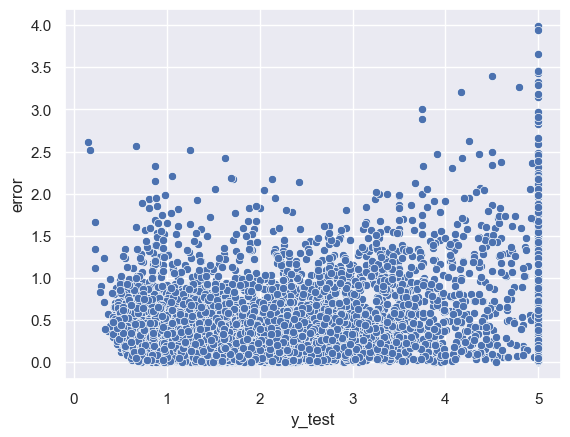

In [103]:
sns.scatterplot(x='y_test', y='error', data=y_df)

<AxesSubplot: xlabel='error', ylabel='Count'>

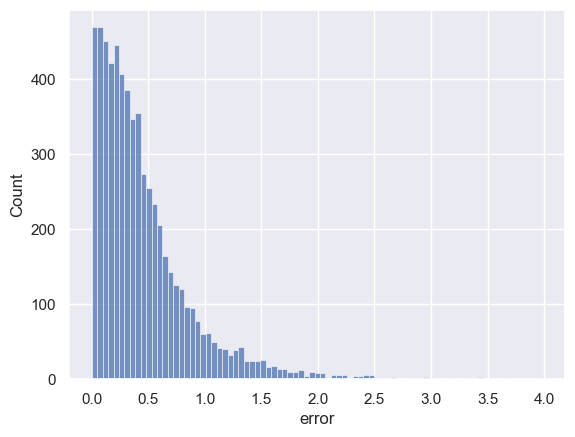

In [104]:
sns.histplot(y_df['error'])

In [105]:
feature_names = list(pl_interactions.get_feature_names_out()) + list(scaler.get_feature_names_out())
features_df = pd.DataFrame(zip(feature_names, gbm.feature_importances_), columns=['feature', 'importance'])
features_df = features_df.sort_values('importance', ascending=False).head(10)


<AxesSubplot: xlabel='importance', ylabel='feature'>

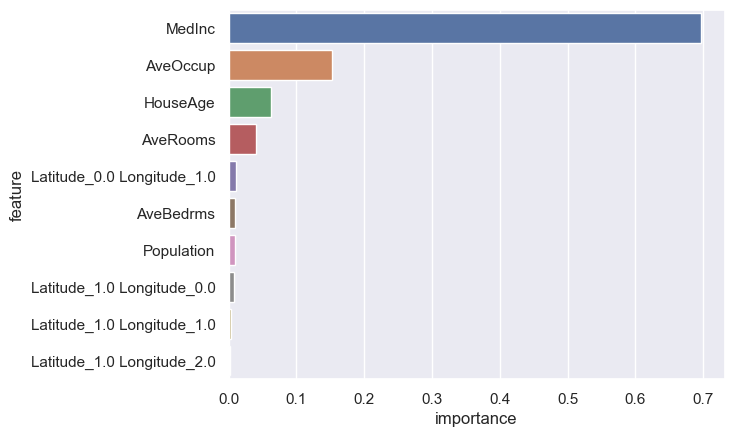

In [106]:
sns.barplot(x='importance', y='feature', data=features_df)

### Model Explanations

In [107]:
shap.initjs()

In [108]:
feature_names = list(pl_interactions.get_feature_names_out()) + list(scaler.get_feature_names_out())
df_test_tr = pd.DataFrame(X_test_tr, columns=feature_names)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


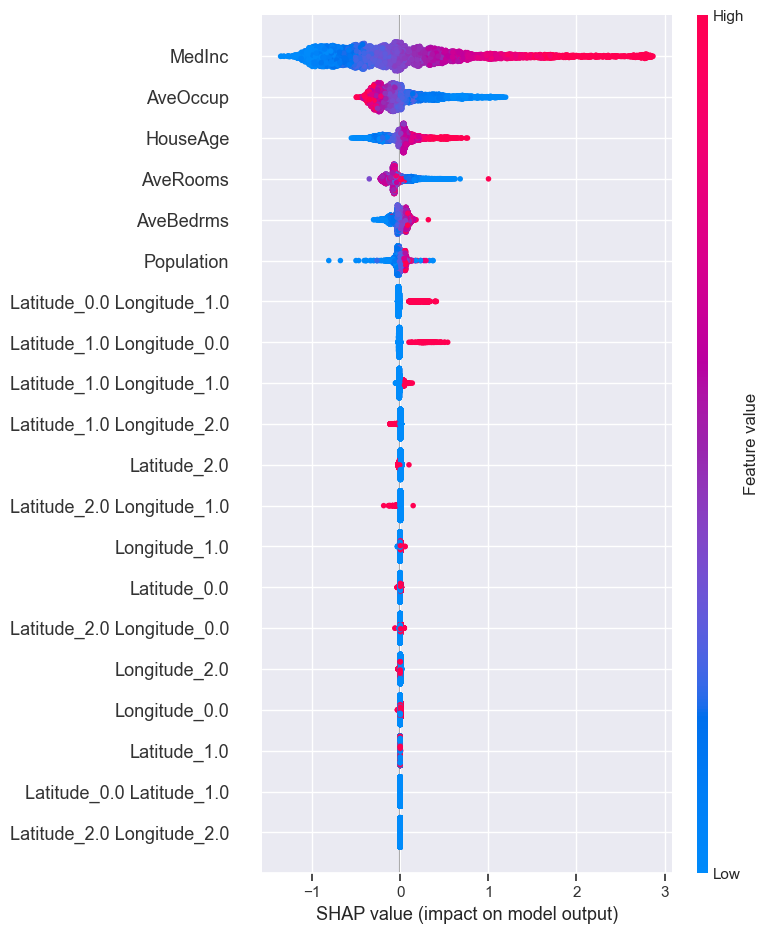

In [109]:
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(df_test_tr)
shap.summary_plot(shap_values, df_test_tr)

In [110]:
pd.DataFrame(zip(feature_names, np.mean(np.abs(shap_values), axis=0)), columns=['features', 'shap_value']).sort_values('shap_value', ascending=False)

,features,shap_value
21,MedInc,0.639157
26,AveOccup,0.228956
22,HouseAge,0.137938
23,AveRooms,0.106732
24,AveBedrms,0.057964
25,Population,0.035061
9,Latitude_0.0 Longitude_1.0,0.034122
12,Latitude_1.0 Longitude_0.0,0.023715
13,Latitude_1.0 Longitude_1.0,0.017449
14,Latitude_1.0 Longitude_2.0,0.008510


In [111]:
pd.DataFrame(np.abs(shap_values), columns=feature_names).iloc[0].sort_values(ascending=False)

MedInc                         9.135663e-01
AveOccup                       2.606248e-01
AveRooms                       7.337006e-02
AveBedrms                      2.994035e-02
Latitude_1.0 Longitude_1.0     2.764688e-02
HouseAge                       1.613381e-02
Population                     1.319734e-02
Latitude_1.0 Longitude_0.0     1.205638e-02
Latitude_0.0 Longitude_1.0     1.060941e-02
Latitude_2.0                   3.080613e-03
Latitude_0.0                   2.576733e-03
Latitude_1.0 Longitude_2.0     2.372412e-03
Longitude_1.0                  2.146807e-03
Longitude_0.0                  1.563745e-03
Latitude_2.0 Longitude_1.0     1.474904e-03
Longitude_2.0                  4.774940e-04
Latitude_2.0 Longitude_0.0     3.675055e-04
Latitude_1.0                   6.480348e-07
Latitude_0.0 Latitude_1.0      0.000000e+00
Latitude_2.0 Longitude_2.0     0.000000e+00
Longitude_0.0 Longitude_1.0    0.000000e+00
Longitude_0.0 Longitude_2.0    0.000000e+00
Longitude_1.0 Longitude_2.0    0